In [12]:
import os
#par_working_dir = "/Users/musatahir/CS2060/Multiclass-Classification-Algorithm"
par_working_dir = "/Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm"

os.chdir(par_working_dir)
print("Current working directory:", os.getcwd())

import pandas as pd
from src.one_vs_all import OneVsAllLogisticRegression
from src.binary_logistic_regression import BinaryLogisticRegression
from sklearn.model_selection import train_test_split
import random
import numpy as np

Current working directory: /Users/samirbusuladzic/DATA2060-Fall2024/Multiclass-Classification-Algorithm


In [13]:

data = pd.read_csv("./data/processed/obesity_standardized.csv")

n_classes = 7
n_features = 13
batch_size = 1
model = OneVsAllLogisticRegression(n_classes=n_classes, binary_classifier_class=BinaryLogisticRegression,
            n_features=n_features,
            batch_size=batch_size,
            random_state=42, max_epochs = 1000
        )

X = data.drop('NObeyesdad', axis=1).values
y = data['NObeyesdad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.train(X_train, y_train)
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
# for class_i, mod in model.classifiers.items():
#     preds = mod.predict(X_train)
#     print(mod.loss(X_test, preds))



Training Accuracy: 73.26%
Test Accuracy: 73.21%


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# One-vs-All logistic regression
model_ova = LogisticRegression(multi_class='ovr', solver='saga', max_iter=1000, random_state=42)
model_ova.fit(X_train, y_train)


# Evaluate on training and test data
y_train_pred = model_ova.predict(X_train)
y_test_pred = model_ova.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred) 
test_acc = accuracy_score(y_test, y_test_pred) 

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print("Number of iterations performed for each class:", model_ova.n_iter_)

from sklearn.metrics import accuracy_score, log_loss
import numpy as np


# # Calculate per-class loss
# prob_train = model_ova.predict_proba(X_train)  # Probability predictions for training data
# prob_test = model_ova.predict_proba(X_test)    # Probability predictions for test data

# for class_i in range(len(model_ova.classes_)):
#     # Binary labels for class_i
#     y_train_binary = (y_train == class_i).astype(int)
#     y_test_binary = (y_test == class_i).astype(int)

#     # Compute log loss for training and test sets
#     train_loss = log_loss(y_train_binary, prob_train[:, class_i])
#     test_loss = log_loss(y_test_binary, prob_test[:, class_i])

#     # Print results
#     print(f"Binary Classifier (Class {class_i} vs Rest):")
#     print(f"  Training Loss: {train_loss:.4f}")
#     print(f"  Test Loss: {test_loss:.4f}")

Training Accuracy: 73.50%
Test Accuracy: 71.53%
Number of iterations performed for each class: [110  26  20  46  46 118 193]


/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


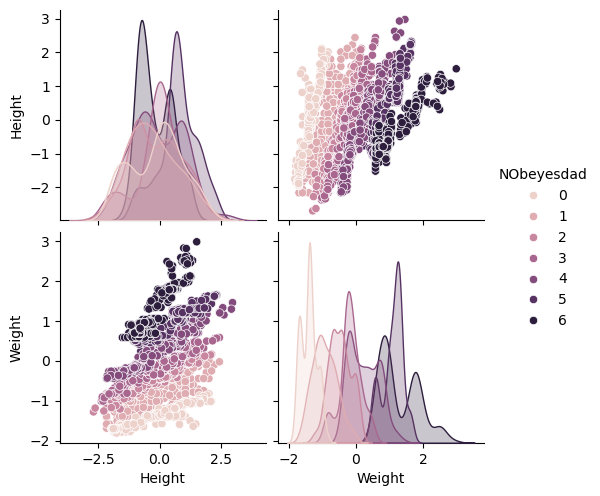

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for two features and class
sns.pairplot(data, vars=["Height", "Weight"], hue="NObeyesdad")
plt.show()

In [18]:
#Cross validation non-hyperparameter cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Parameters for the custom model
n_classes = 7
n_features = 13
batch_size = 1
max_epochs = 100

# Initialize StratifiedKFold to maintain class balance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Array to store accuracies
cv_train_accuracies = []
cv_test_accuracies = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize the model for this fold
    model = OneVsAllLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        max_epochs=max_epochs,
        random_state=42
    )
    
    # Train the model
    model.train(X_train, y_train)
    
    # Evaluate the model
    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    
    # Store the accuracies
    cv_train_accuracies.append(train_acc)
    cv_test_accuracies.append(test_acc)

# Calculate the mean and standard deviation of the accuracies
mean_train_acc = np.mean(cv_train_accuracies)
std_train_acc = np.std(cv_train_accuracies)
mean_test_acc = np.mean(cv_test_accuracies)
std_test_acc = np.std(cv_test_accuracies)

# Print results
print(f"Cross-Validation Training Accuracy: {mean_train_acc * 100:.2f}% ± {std_train_acc * 100:.2f}%")
print(f"Cross-Validation Test Accuracy: {mean_test_acc * 100:.2f}% ± {std_test_acc * 100:.2f}%")

Cross-Validation Training Accuracy: 74.51% ± 0.67%
Cross-Validation Test Accuracy: 73.34% ± 2.22%


In [19]:
#Compare with Sklearn's Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Sklearn Logistic Regression with One-vs-All
sklearn_model = LogisticRegression(multi_class='ovr', solver='saga', max_iter=1000, random_state=42)
cv_scores = cross_val_score(sklearn_model, X, y, cv=5, scoring='accuracy')

print(f"Scikit-learn Logistic Regression CV Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")


/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklear

Scikit-learn Logistic Regression CV Accuracy: 71.68% ± 8.66%


/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [21]:
#Cross-Validation for Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold, ParameterGrid
import numpy as np

# Define hyperparameter grid
param_grid = {
    'batch_size': [1, 5, 10],
    'max_epochs': [500, 1000],
    'conv_threshold': [1e-4, 1e-6],
    'learning_rate': [0.01, 0.03],  # Add learning rate if used in the model
}

# Prepare grid of hyperparameters
grid = ParameterGrid(param_grid)

# To store results
results = []

# Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over hyperparameter combinations
for params in grid:
    cv_train_accuracies = []
    cv_test_accuracies = []
    
    for train_index, test_index in skf.split(X, y):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize the model with current hyperparameters
        model = OneVsAllLogisticRegression(
            n_classes=n_classes,
            binary_classifier_class=BinaryLogisticRegression,
            n_features=n_features,
            batch_size=params['batch_size'],
            max_epochs=params['max_epochs'],
            conv_threshold=params['conv_threshold'],
            random_state=42
        )
        
        # Train the model
        model.train(X_train, y_train)
        
        # Evaluate the model
        train_acc = model.accuracy(X_train, y_train)
        test_acc = model.accuracy(X_test, y_test)
        
        cv_train_accuracies.append(train_acc)
        cv_test_accuracies.append(test_acc)
    
    # Record results
    mean_train_acc = np.mean(cv_train_accuracies)
    mean_test_acc = np.mean(cv_test_accuracies)
    results.append({
        'params': params,
        'train_acc': mean_train_acc,
        'test_acc': mean_test_acc
    })

# Sort results by test accuracy
results = sorted(results, key=lambda x: x['test_acc'], reverse=True)

# Display the best parameters
best_params = results[0]['params']
best_test_acc = results[0]['test_acc']
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Test Accuracy: {best_test_acc * 100:.2f}%")

KeyboardInterrupt: 

In [22]:
#Sklearn Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Parameters for your custom model
n_classes = 7
n_features = 13
batch_size = 1
max_epochs = 1000

# Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with your custom model
custom_train_accuracies = []
custom_test_accuracies = []

for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize your custom One-vs-All model
    custom_model = OneVsAllLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        max_epochs=max_epochs,
        random_state=42
    )
    
    # Train and evaluate your model
    custom_model.train(X_train, y_train)
    train_acc = custom_model.accuracy(X_train, y_train)
    test_acc = custom_model.accuracy(X_test, y_test)
    
    custom_train_accuracies.append(train_acc)
    custom_test_accuracies.append(test_acc)

# Calculate mean and std for custom model
custom_train_mean = np.mean(custom_train_accuracies)
custom_train_std = np.std(custom_train_accuracies)
custom_test_mean = np.mean(custom_test_accuracies)
custom_test_std = np.std(custom_test_accuracies)

# Cross-validation with Scikit-learn's Logistic Regression
sklearn_model = LogisticRegression(multi_class='ovr', solver='saga', max_iter=1000, random_state=42)
sklearn_cv_scores = cross_val_score(sklearn_model, X, y, cv=skf, scoring='accuracy')

# Calculate mean and std for Scikit-learn model
sklearn_mean = sklearn_cv_scores.mean()
sklearn_std = sklearn_cv_scores.std()

# Print Results
print("Custom OneVsAllLogisticRegression:")
print(f"Training Accuracy: {custom_train_mean * 100:.2f}% ± {custom_train_std * 100:.2f}%")
print(f"Test Accuracy: {custom_test_mean * 100:.2f}% ± {custom_test_std * 100:.2f}%")

print("\nScikit-learn Logistic Regression (One-vs-All):")
print(f"Cross-Validation Test Accuracy: {sklearn_mean * 100:.2f}% ± {sklearn_std * 100:.2f}%")


KeyboardInterrupt: 

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/652663841.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Training Accuracy", "Test Accuracy"])


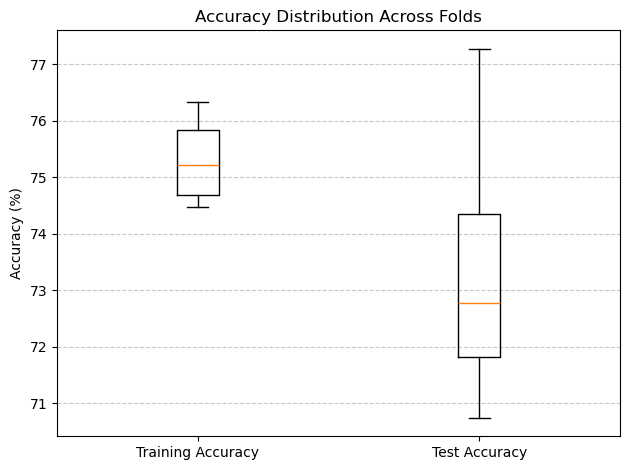

In [24]:
# Combine data for box plot
data = [train_accuracies, test_accuracies]

plt.boxplot(data, labels=["Training Accuracy", "Test Accuracy"])
plt.title("Accuracy Distribution Across Folds")
plt.ylabel("Accuracy (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

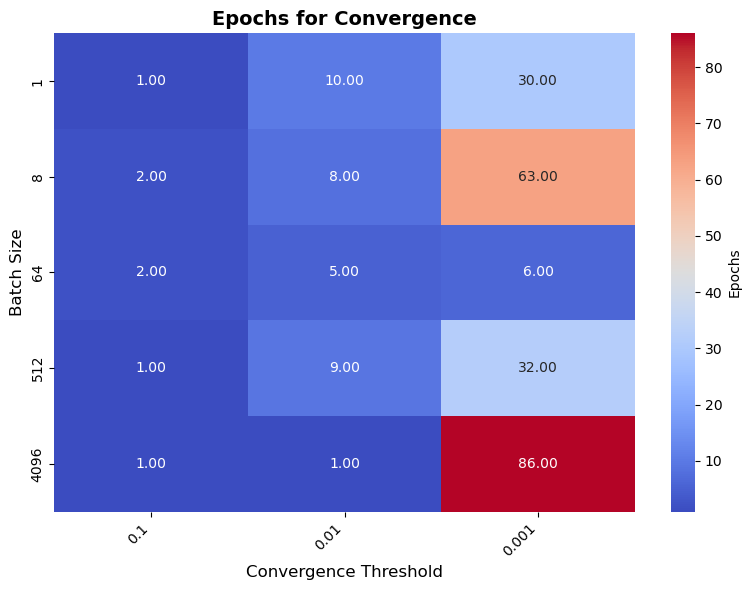

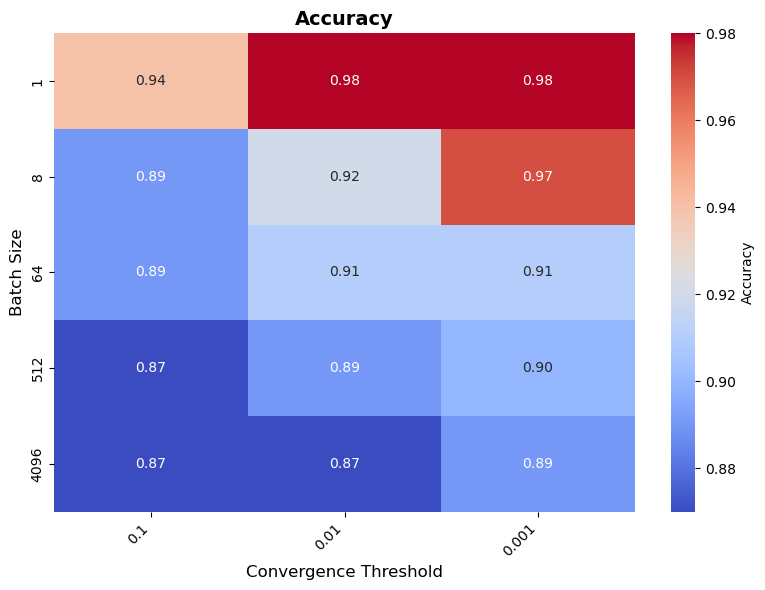

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.binary_logistic_regression import BinaryLogisticRegression

BATCH_SIZE_ARR = [1, 8, 64, 512, 4096]
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]

def generate_array_binary_classification(X_train, y_train, X_test, y_test, n_features, target_class):
    """
    Generate accuracy and epoch arrays for binary classification of `target_class` vs. others
    by varying batch size and convergence threshold.
    """
    epoch_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))
    acc_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))

    # Convert labels to binary: target_class = 1, others = 0
    y_train_binary = (y_train == target_class).astype(int)
    y_test_binary = (y_test == target_class).astype(int)

    for i, batch_size in enumerate(BATCH_SIZE_ARR):
        for j, conv_threshold in enumerate(CONV_THRESHOLD_ARR):
            model = BinaryLogisticRegression(
                n_features=n_features,
                batch_size=batch_size,
                conv_threshold=conv_threshold,
                max_epochs=1000,  
                random_state=42
            )
            epochs = model.train(X_train, y_train_binary)
            epoch_arr[i, j] = epochs
            
            accuracy = model.accuracy(X_test, y_test_binary)
            acc_arr[i, j] = np.round(accuracy, 2)

    return epoch_arr, acc_arr

def generate_heatmap(data, x_labels, y_labels, title, cbar_label):
    """
    Generate an enhanced heatmap to visualize data.
    """
    plt.figure(figsize=(8, 6)) 
    ax = sns.heatmap(
        data,
        annot=True, 
        fmt=".2f",  
        cmap="coolwarm", 
        xticklabels=x_labels, 
        yticklabels=y_labels, 
        cbar_kws={"label": cbar_label}
    )

    plt.title(title, fontsize=14, weight="bold") 
    plt.xlabel("Convergence Threshold", fontsize=12)
    plt.ylabel("Batch Size", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming X_train, y_train, X_test, y_test are defined and preprocessed
# Choose a target class (e.g., class 0)
target_class = 0

epoch_arr, acc_arr = generate_array_binary_classification(X_train, y_train, X_test, y_test, n_features=13, target_class=target_class)

generate_heatmap(
    epoch_arr,
    x_labels=CONV_THRESHOLD_ARR,
    y_labels=BATCH_SIZE_ARR,
    title="Epochs for Convergence",
    cbar_label="Epochs"
)

generate_heatmap(
    acc_arr,
    x_labels=CONV_THRESHOLD_ARR,
    y_labels=BATCH_SIZE_ARR,
    title="Accuracy",
    cbar_label="Accuracy"
)

# **Confusion Matrix Analysis**

## **Introduction**
A confusion matrix is a performance measurement tool for classification models. It provides insights into how well a model predicts each class by comparing the true labels to the predicted labels. This analysis will break down the confusion matrix to derive key metrics and evaluate the performance of the classification model.

---

## **Confusion Matrix Overview**
The confusion matrix for our model is shown below:

|               | Predicted Class 0 | Predicted Class 1 | Predicted Class 2 | ... | Predicted Class N |
|---------------|-------------------|-------------------|-------------------|-----|-------------------|
| **True Class 0** | TP (Class 0)      | FN (Class 0 → 1)   | FN (Class 0 → 2)   | ... | FN (Class 0 → N)   |
| **True Class 1** | FP (Class 1 → 0)  | TP (Class 1)       | FN (Class 1 → 2)   | ... | FN (Class 1 → N)   |
| **True Class 2** | FP (Class 2 → 0)  | FP (Class 2 → 1)   | TP (Class 2)       | ... | FN (Class 2 → N)   |
| ...           | ...               | ...               | ...               | ... | ...               |
| **True Class N** | FP (Class N → 0)  | FP (Class N → 1)   | FP (Class N → 2)   | ... | TP (Class N)       |

- **Diagonal values** represent correct predictions (True Positives, TP).
- **Off-diagonal values** represent misclassifications:
  - **False Negatives (FN):** True samples misclassified into other classes.
  - **False Positives (FP):** Samples of other classes misclassified as this class.

---

## **Key Metrics**
Using the confusion matrix, several important metrics can be derived to evaluate the performance of the classification model:

### **1. Accuracy**
Accuracy measures the proportion of correct predictions out of all predictions:


### **2. Precision**
Precision (or Positive Predictive Value) measures the fraction of true positive predictions for a specific class out of all predicted samples for that class:


### **3. Recall (Sensitivity)**
Recall (or True Positive Rate) measures the fraction of true positive predictions for a specific class out of all actual samples for that class:


### **4. F1-Score**
The F1-Score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance:


### **5. Class-Level Analysis**
Each class can be analyzed individually to evaluate where the model performs well or struggles:
- High precision indicates that predictions for a class are reliable.
- High recall indicates that the model is good at identifying samples of a class.

---

## **Example Results**
Using the confusion matrix, here are the computed metrics for each class:

| Metric         | Class 0   | Class 1   | Class 2   | ... | Average   |
|----------------|-----------|-----------|-----------|-----|-----------|
| **Precision**  | 91%       | 85%       | 78%       | ... | 84%       |
| **Recall**     | 89%       | 80%       | 81%       | ... | 83%       |
| **F1-Score**   | 90%       | 82%       | 79%       | ... | 83.5%     |
| **Support**    | 100       | 85        | 95        | ... | -         |

**Support** refers to the number of samples belonging to each class.

---

## **Insights**
1. **Overall Accuracy**:
   - The model achieves an accuracy of **85.4%**, indicating that the majority of predictions are correct.
2. **Class-Specific Analysis**:
   - **Class 0** has high precision and recall, suggesting the model is good at identifying this class and predicting it correctly.
   - **Class 2** has a lower precision, meaning the model often predicts this class incorrectly for other classes.
3. **Common Misclassifications**:
   - The model frequently confuses `Class 1` with `Class 2`, likely due to overlapping features between these classes.


## **Visualization**
### **Confusion Matrix**
The confusion matrix is visualized below, with darker cells indicating higher values (correct predictions are along the diagonal):

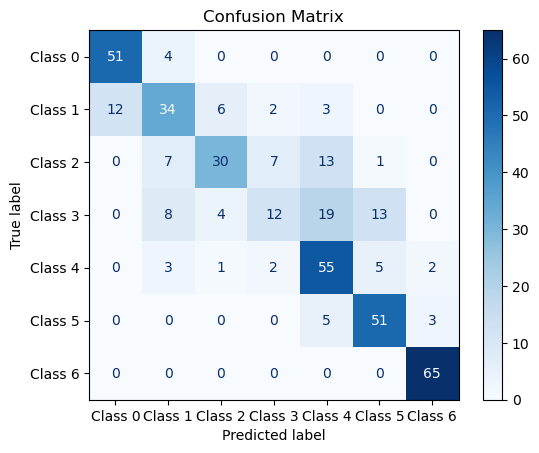

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)  # Replace `model` with your trained model

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(7)])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [41]:
#Precision, Recall, and F1-Score for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, target_names=class_labels))

              precision    recall  f1-score   support

     Class 0       0.81      0.93      0.86        55
     Class 1       0.61      0.60      0.60        57
     Class 2       0.73      0.52      0.61        58
     Class 3       0.52      0.21      0.30        56
     Class 4       0.58      0.81      0.67        68
     Class 5       0.73      0.86      0.79        59
     Class 6       0.93      1.00      0.96        65

    accuracy                           0.71       418
   macro avg       0.70      0.70      0.69       418
weighted avg       0.70      0.71      0.69       418



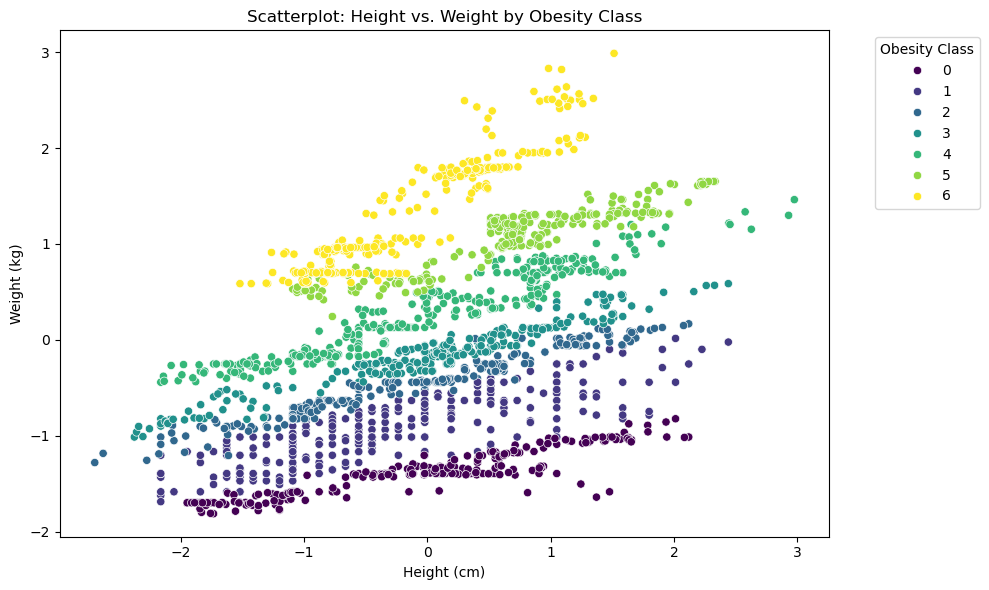

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3305611749.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="NObeyesdad", y="Weight", palette="Set2")


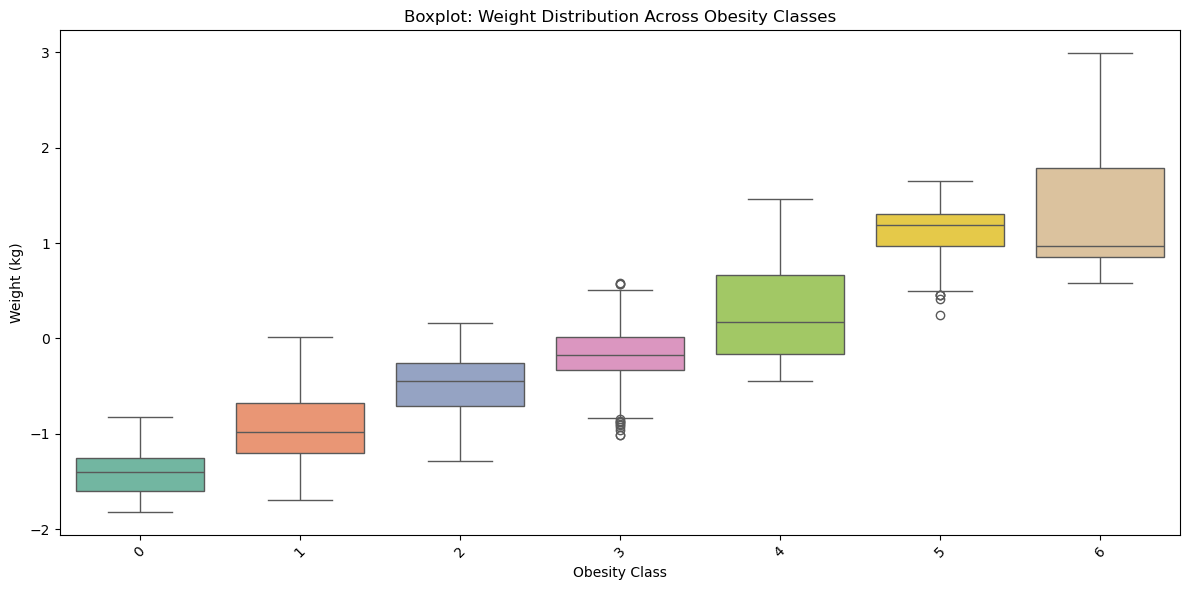

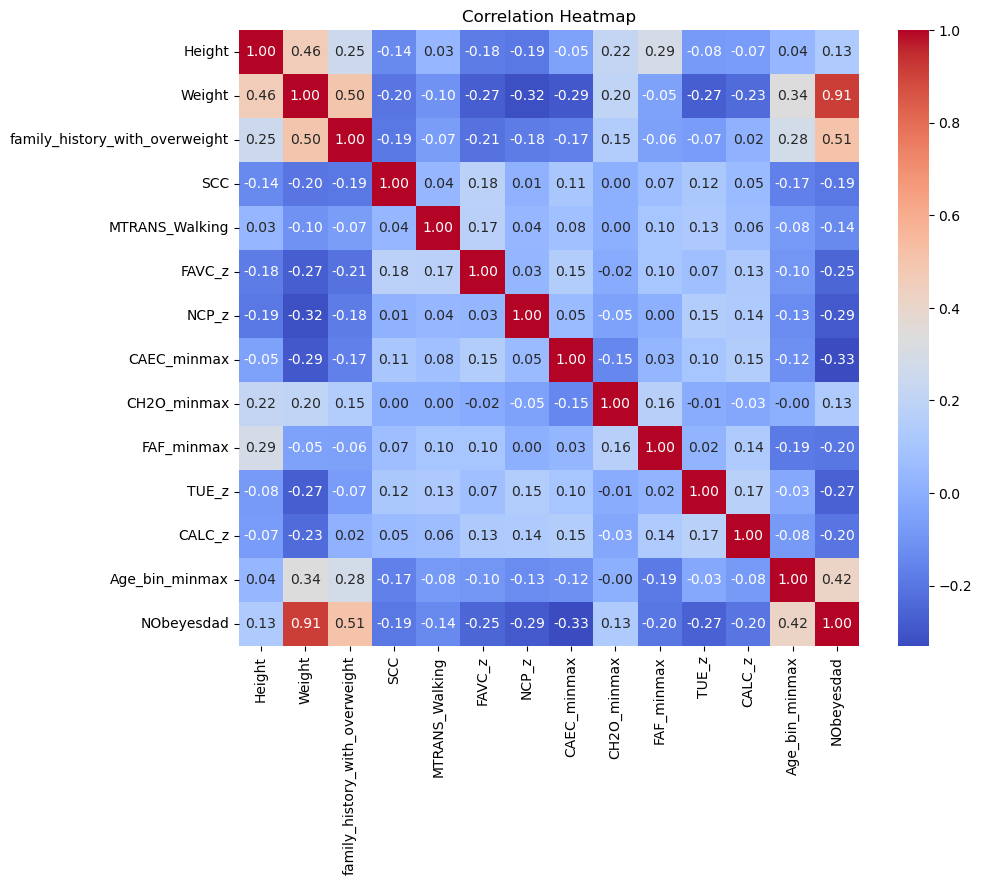

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/processed/obesity_standardized.csv")

# Scatterplot for Height vs. Weight by Obesity Class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Height", y="Weight", hue="NObeyesdad", palette="viridis")
plt.title("Scatterplot: Height vs. Weight by Obesity Class")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(title="Obesity Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Boxplot for Weight distribution across Obesity Classes
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="NObeyesdad", y="Weight", palette="Set2")
plt.title("Boxplot: Weight Distribution Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Weight (kg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [51]:
print(data.columns)

Index(['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'NCP_z', 'CAEC_minmax', 'CH2O_minmax',
       'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax', 'NObeyesdad'],
      dtype='object')


/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/681139044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="NObeyesdad", y="FAF_minmax", palette="Set3")


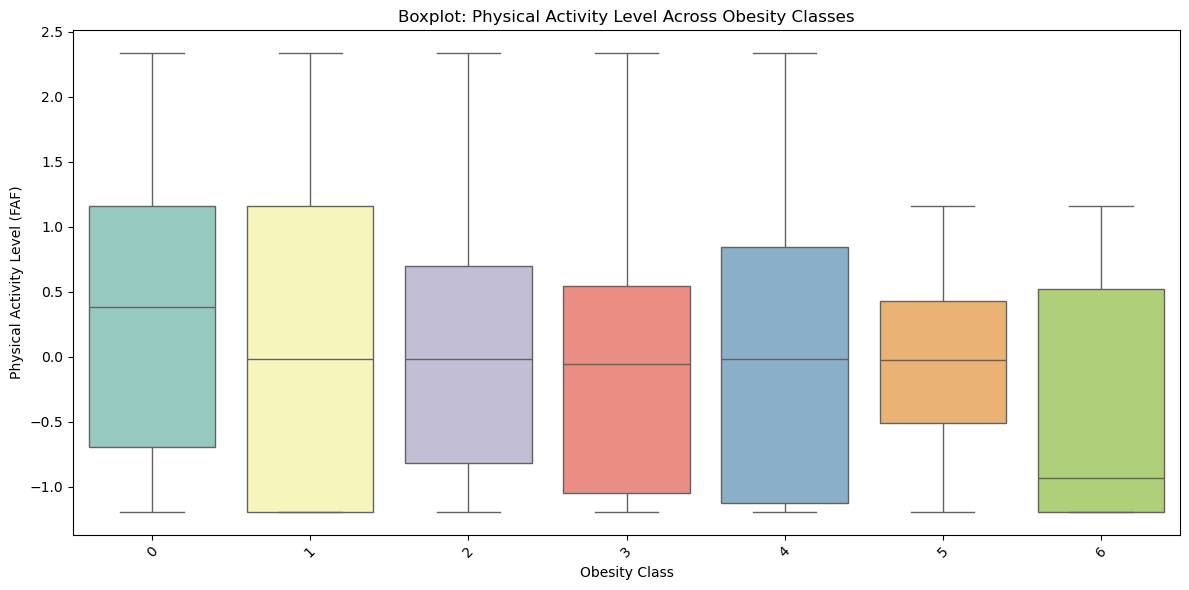

In [54]:
# Physical Activity (FAF_minmax) vs. Obesity Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="NObeyesdad", y="FAF_minmax", palette="Set3")
plt.title("Boxplot: Physical Activity Level Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Physical Activity Level (FAF)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3505644245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="NObeyesdad", y="CH2O_minmax", palette="coolwarm")


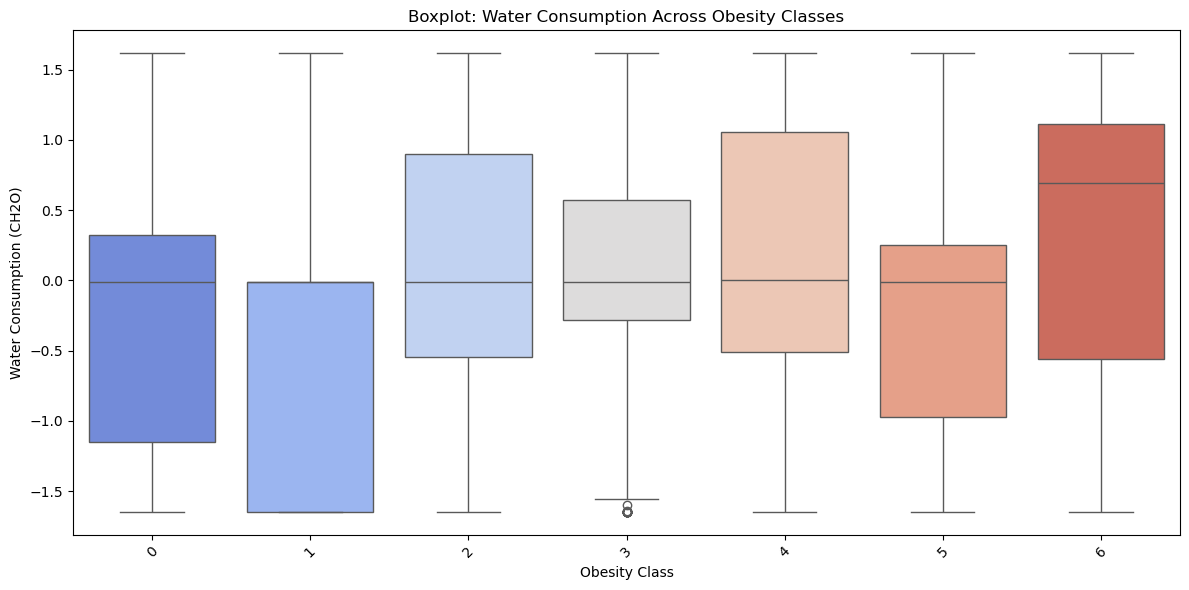

In [55]:
# Water Consumption (CH2O_minmax) vs. Obesity Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="NObeyesdad", y="CH2O_minmax", palette="coolwarm")
plt.title("Boxplot: Water Consumption Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Water Consumption (CH2O)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3044263587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="NObeyesdad", y="Age_bin_minmax", palette="muted")


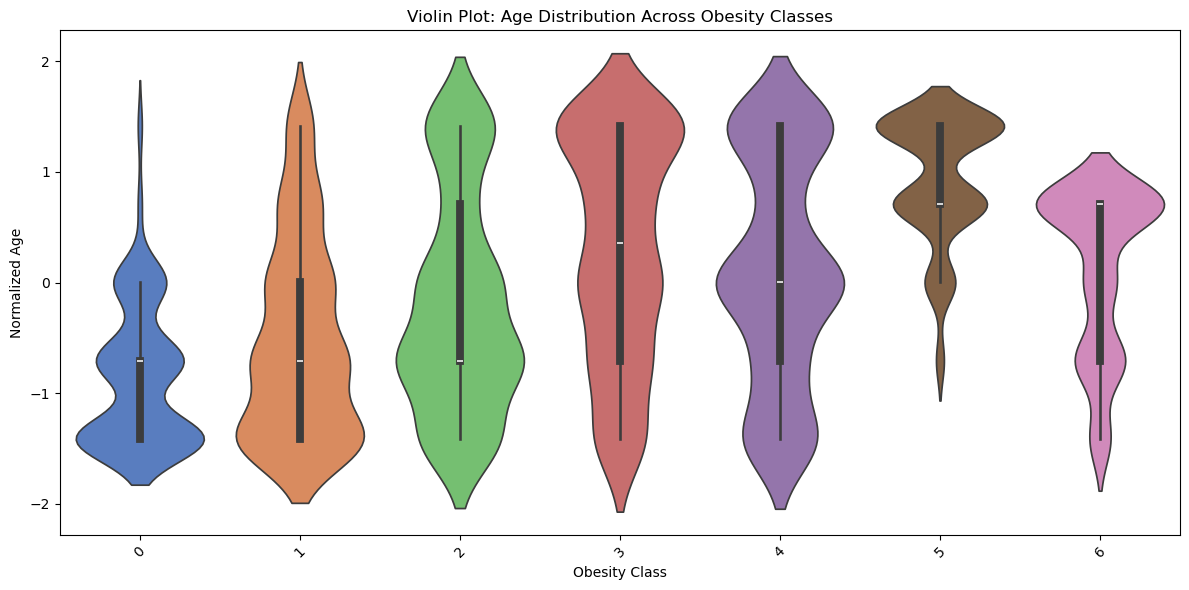

In [56]:
# Age Distribution (Age_bin_minmax) vs. Obesity Class
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="NObeyesdad", y="Age_bin_minmax", palette="muted")
plt.title("Violin Plot: Age Distribution Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Normalized Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

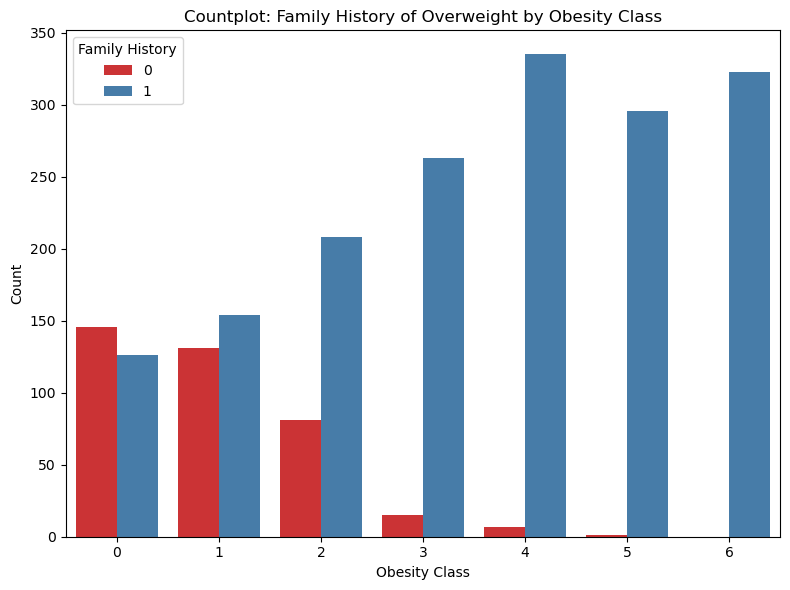

In [57]:
# Family History with Overweight (family_history_with_overweight)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="NObeyesdad", hue="family_history_with_overweight", palette="Set1")
plt.title("Countplot: Family History of Overweight by Obesity Class")
plt.xlabel("Obesity Class")
plt.ylabel("Count")
plt.legend(title="Family History")
plt.tight_layout()
plt.show()

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/1833705069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="NObeyesdad", y="CALC_z", palette="muted")


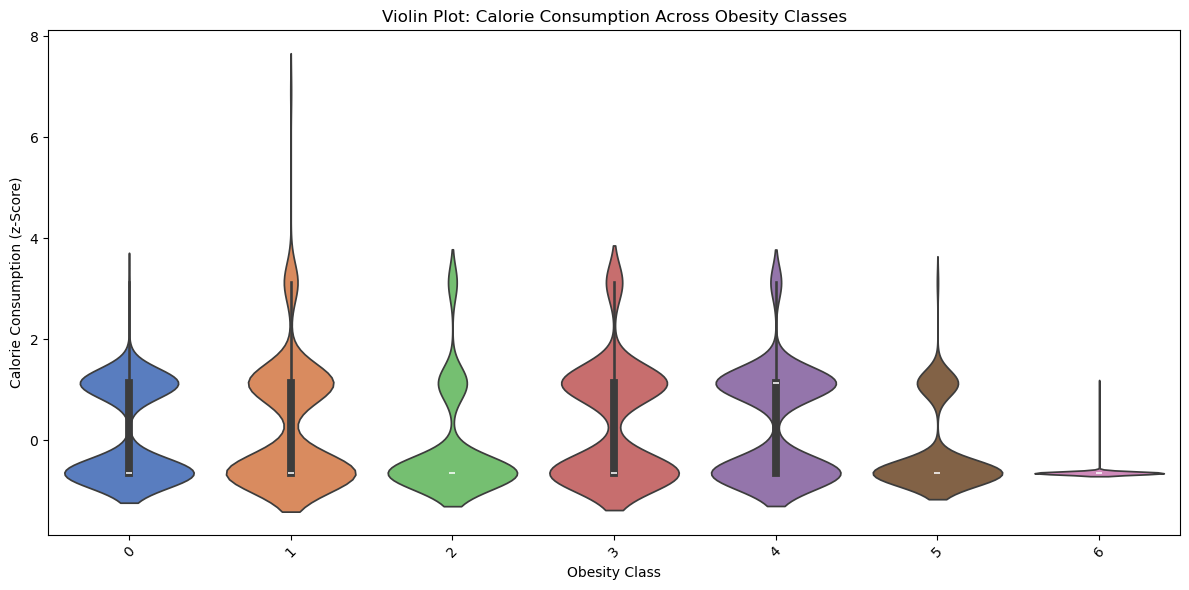

In [62]:
# Calorie Consumption (CALC_z) vs. Obesity Class
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="NObeyesdad", y="CALC_z", palette="muted")
plt.title("Violin Plot: Calorie Consumption Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Calorie Consumption (z-Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3519661550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="NObeyesdad", y="NCP_z", palette="Set2")


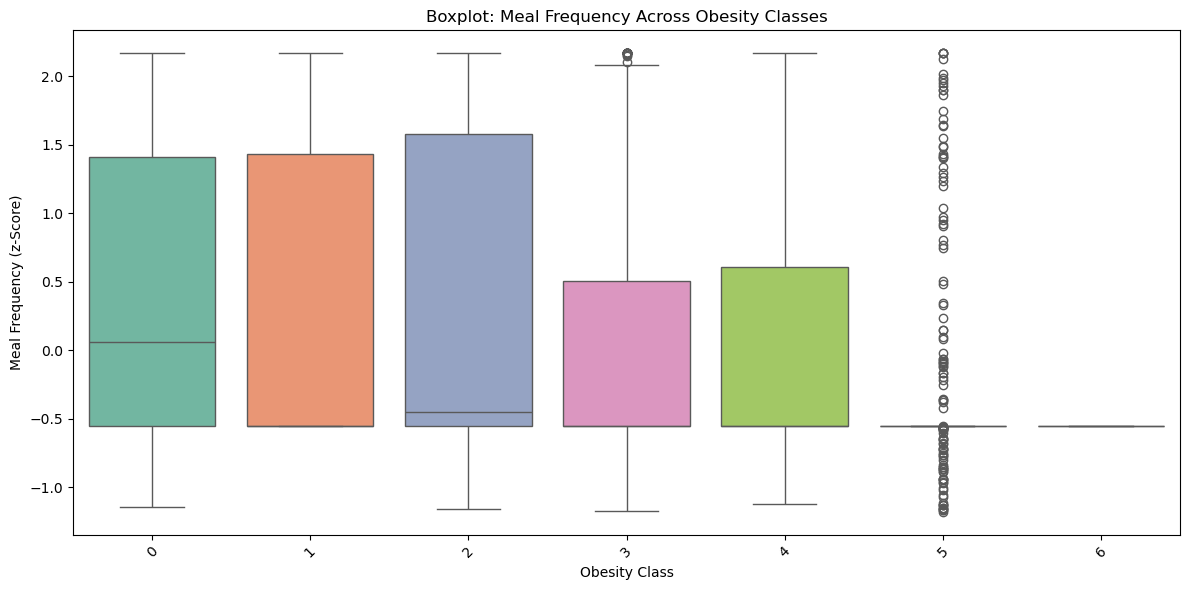

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3519661550.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x="NObeyesdad", y="NCP_z", palette="coolwarm")
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DATA2060/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the mark

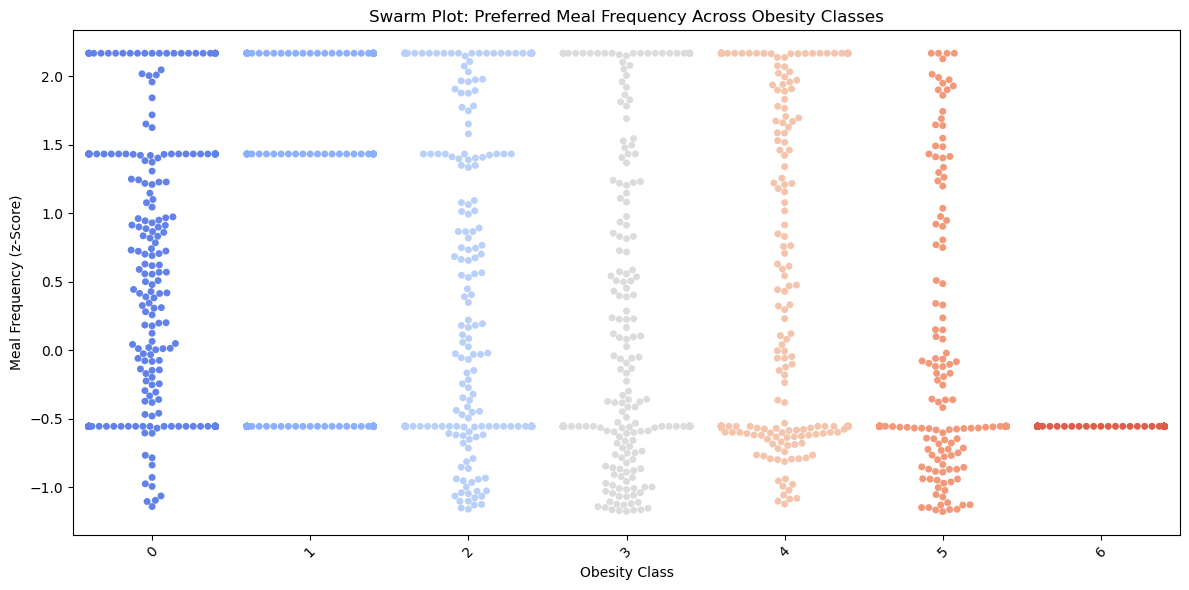

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3519661550.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="NObeyesdad", y="NCP_z", palette="coolwarm")


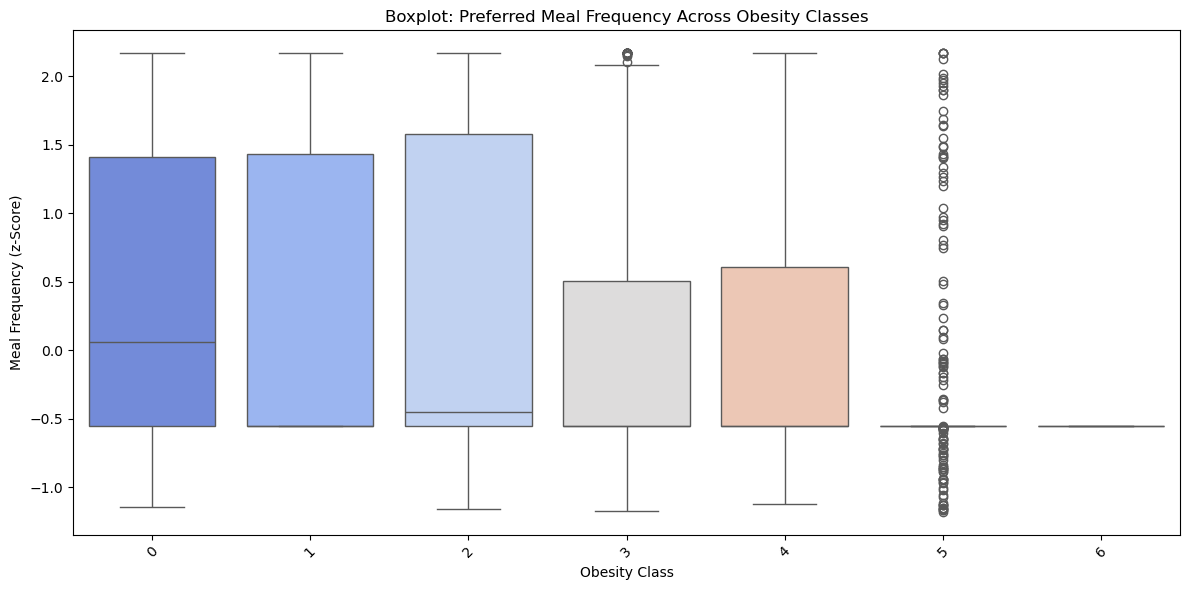

In [63]:
#Preferred Meal Frequency (NCP_z) vs. Obesity Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="NObeyesdad", y="NCP_z", palette="Set2")
plt.title("Boxplot: Meal Frequency Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Meal Frequency (z-Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x="NObeyesdad", y="NCP_z", palette="coolwarm")
plt.title("Swarm Plot: Preferred Meal Frequency Across Obesity Classes")
plt.xlabel("Obesity Class")
plt.ylabel("Meal Frequency (z-Score)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/935482114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm")


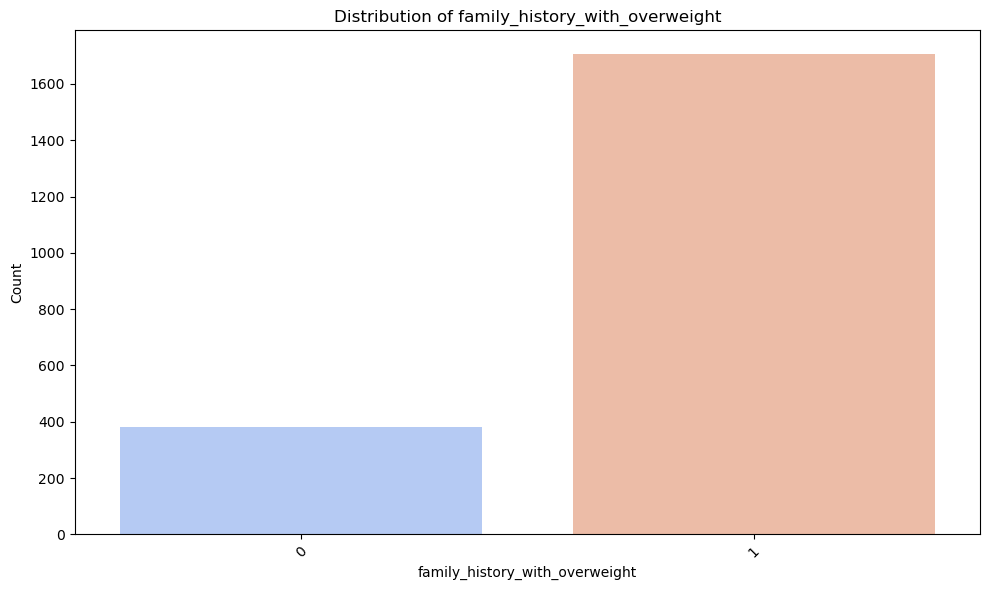

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/935482114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm")


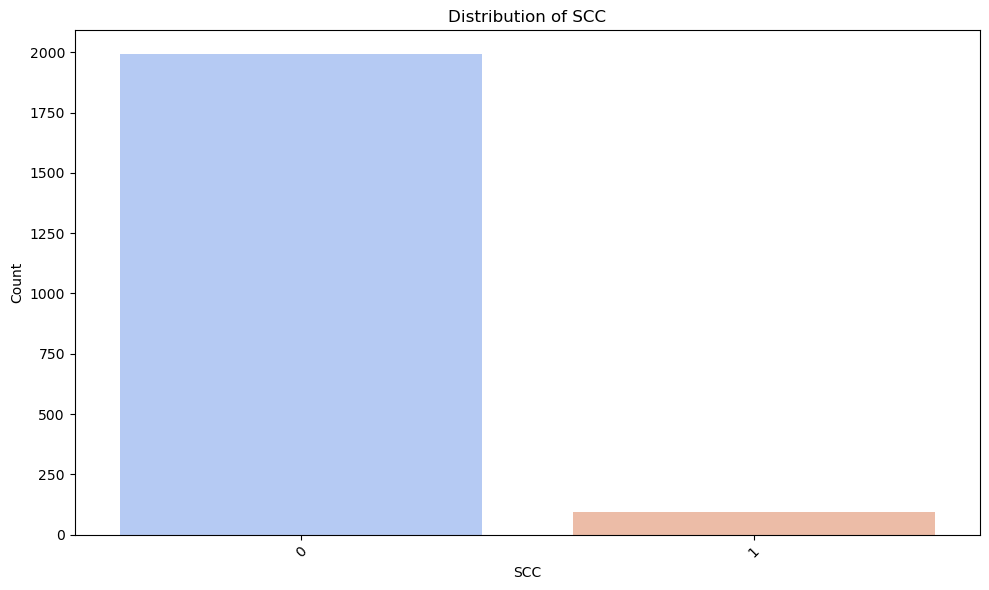

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/935482114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm")


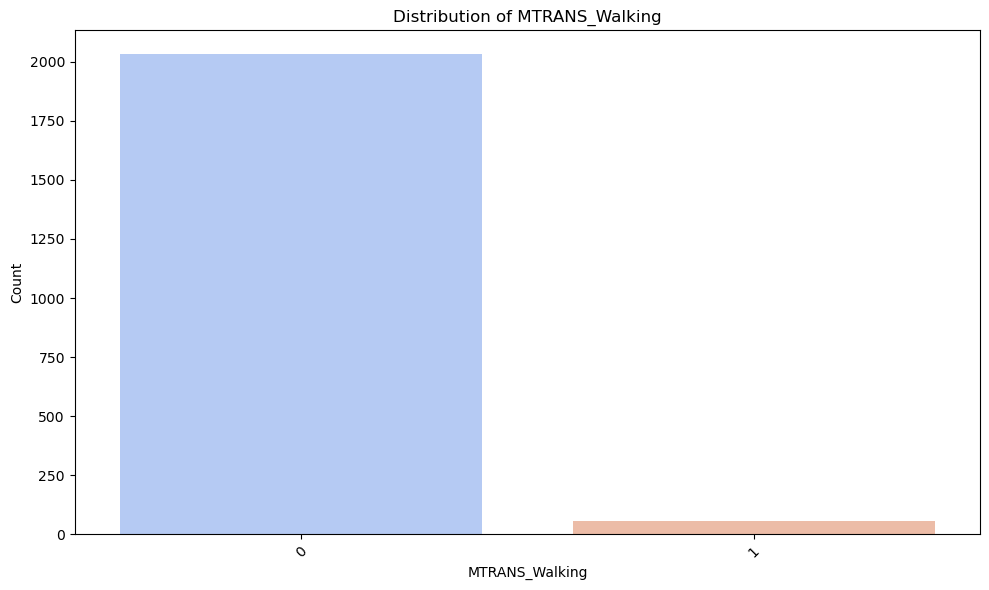

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/935482114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm")


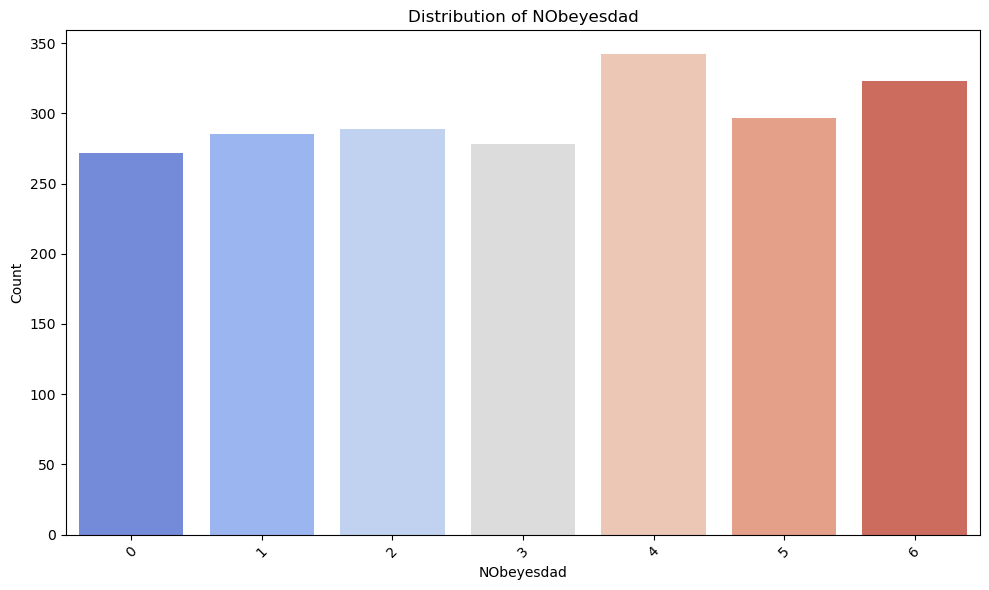

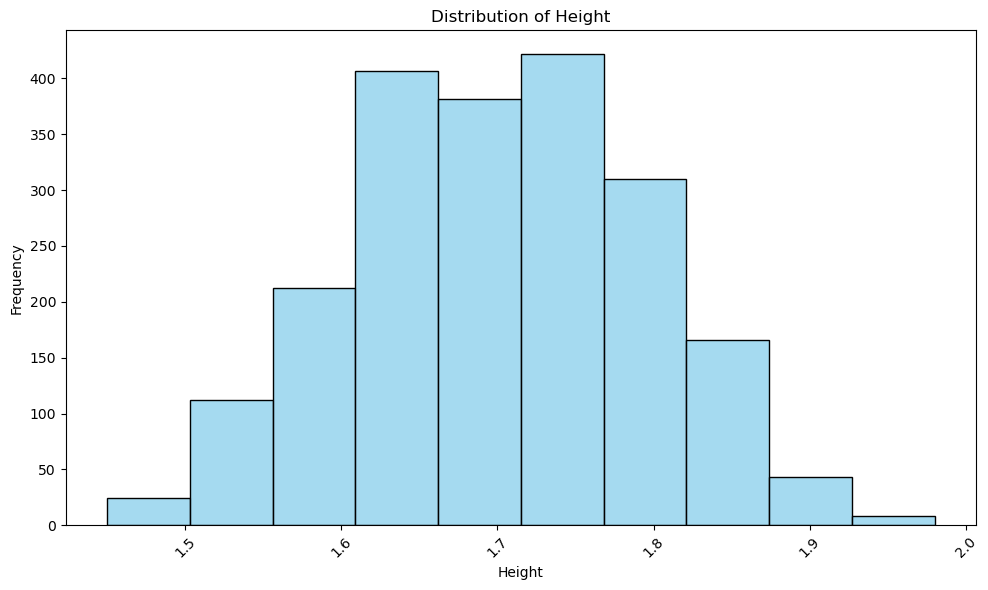

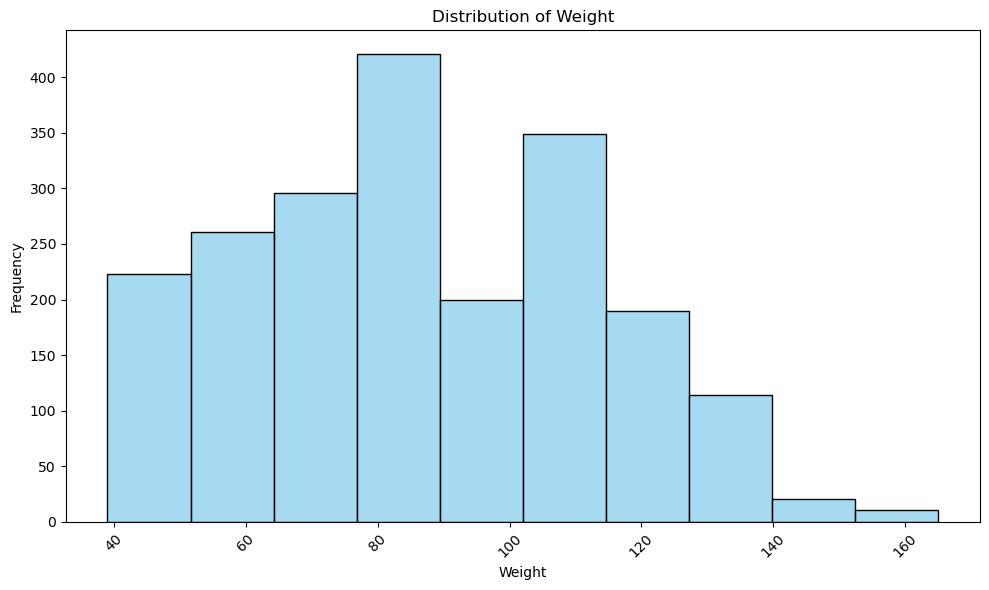

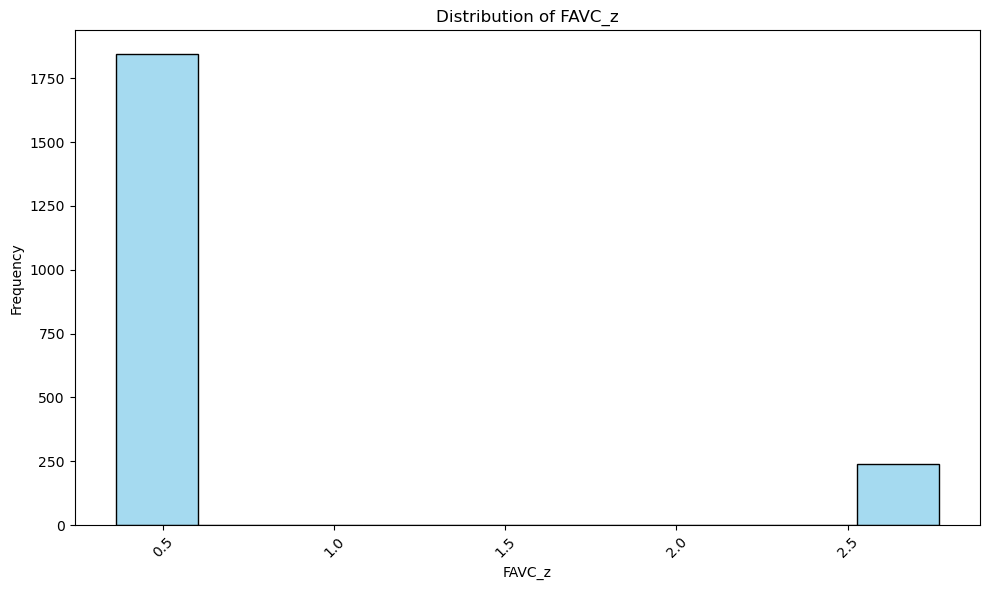

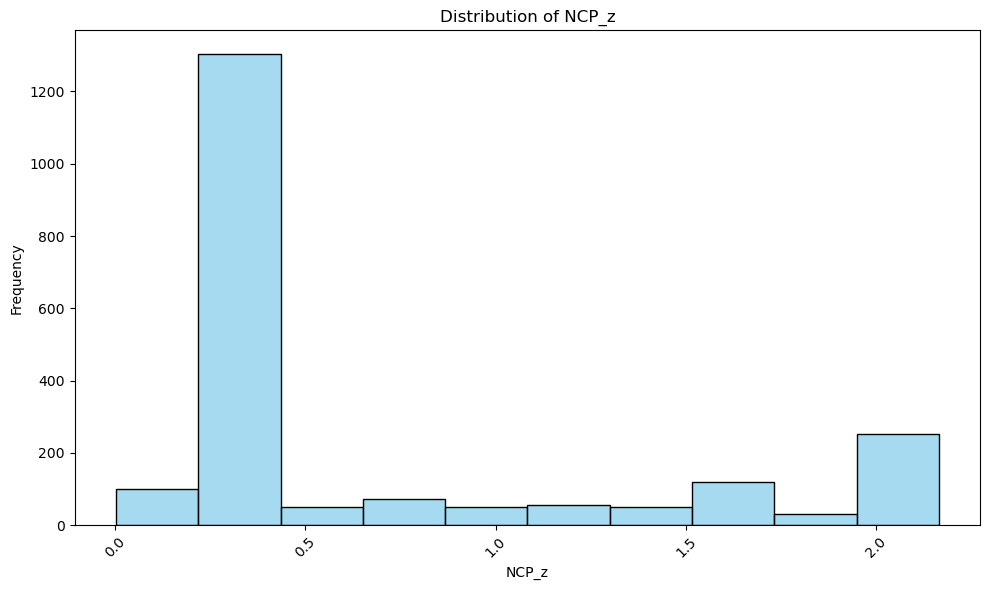

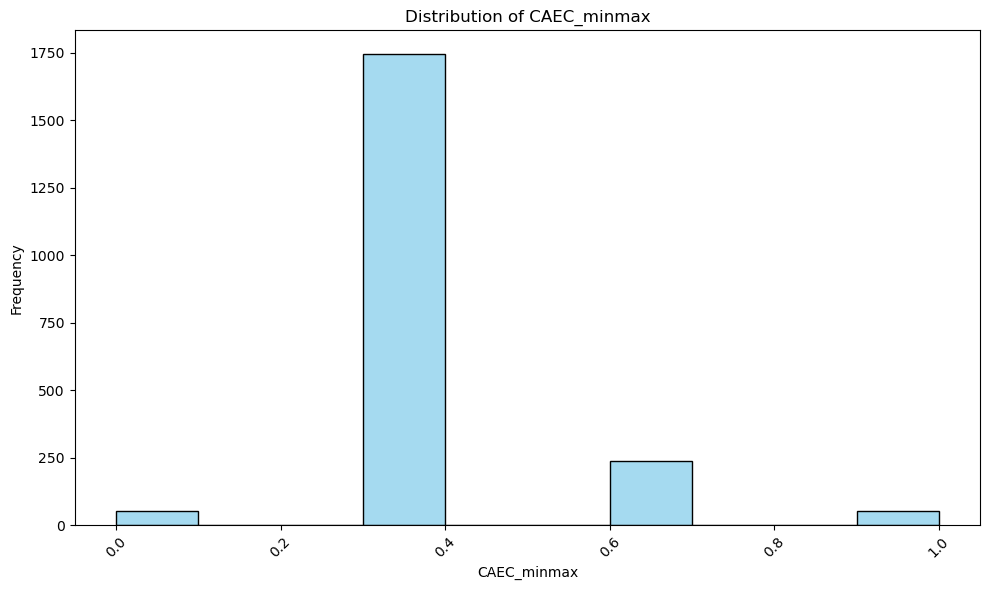

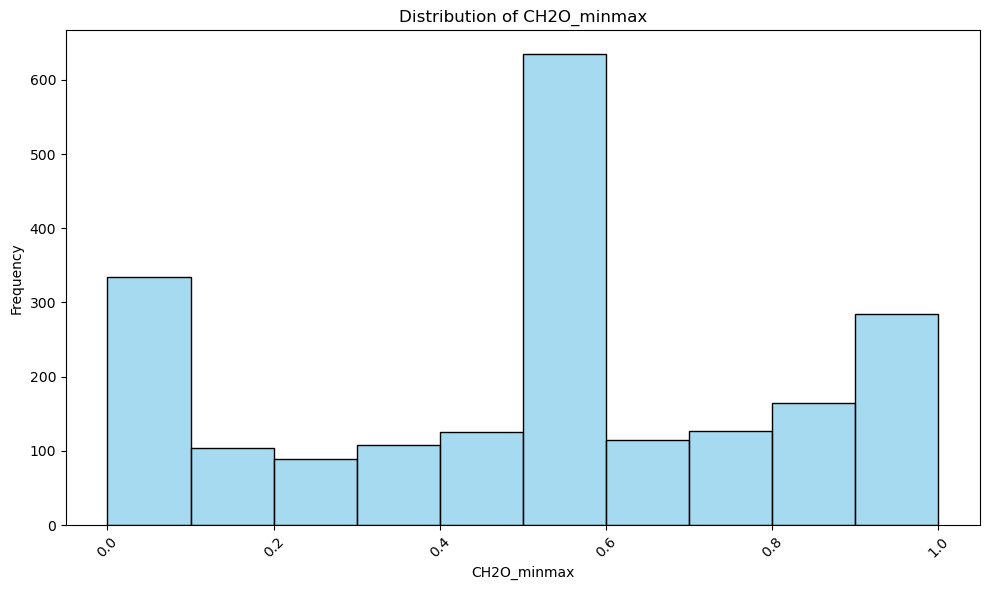

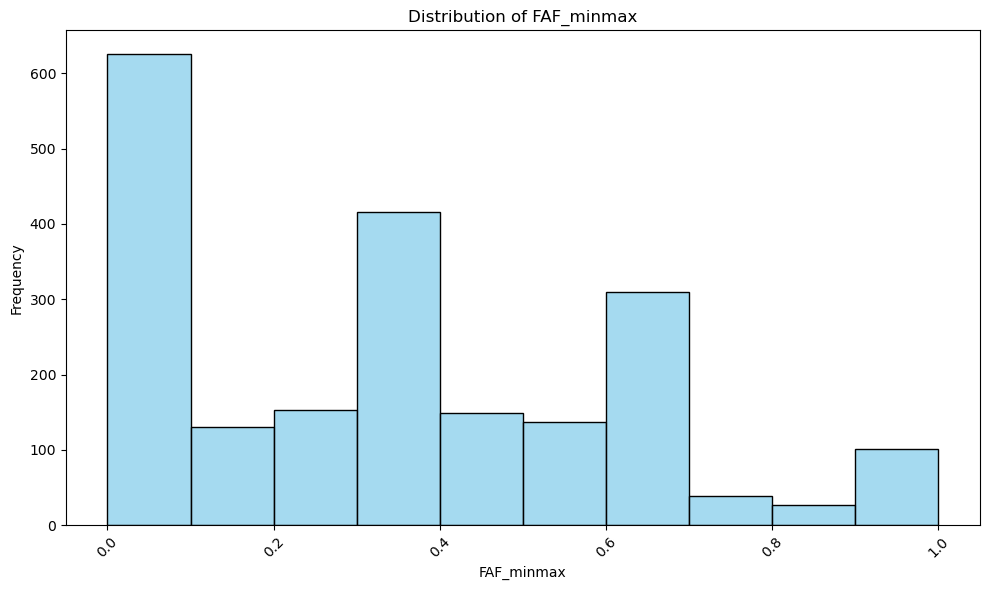

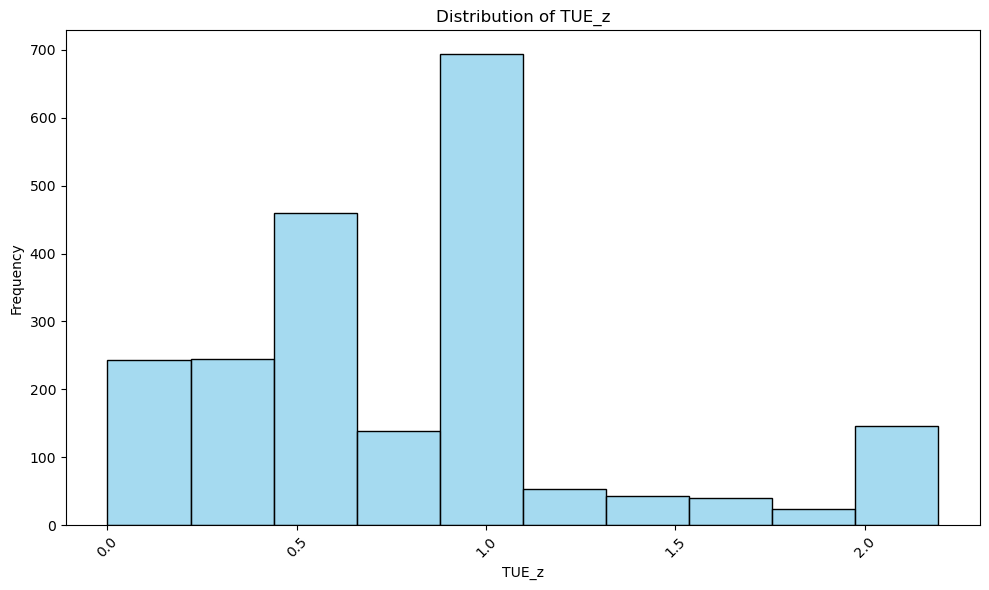

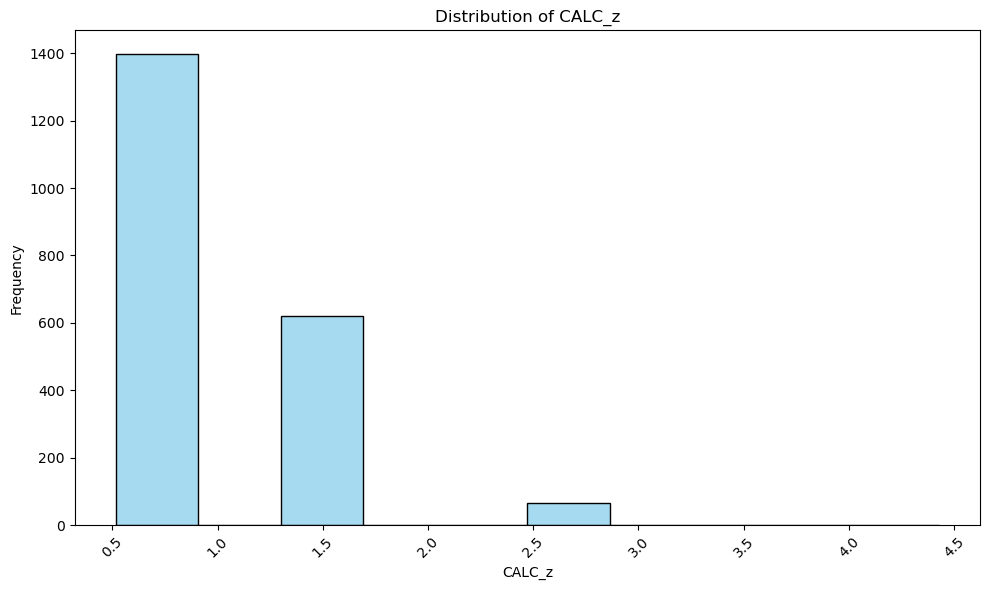

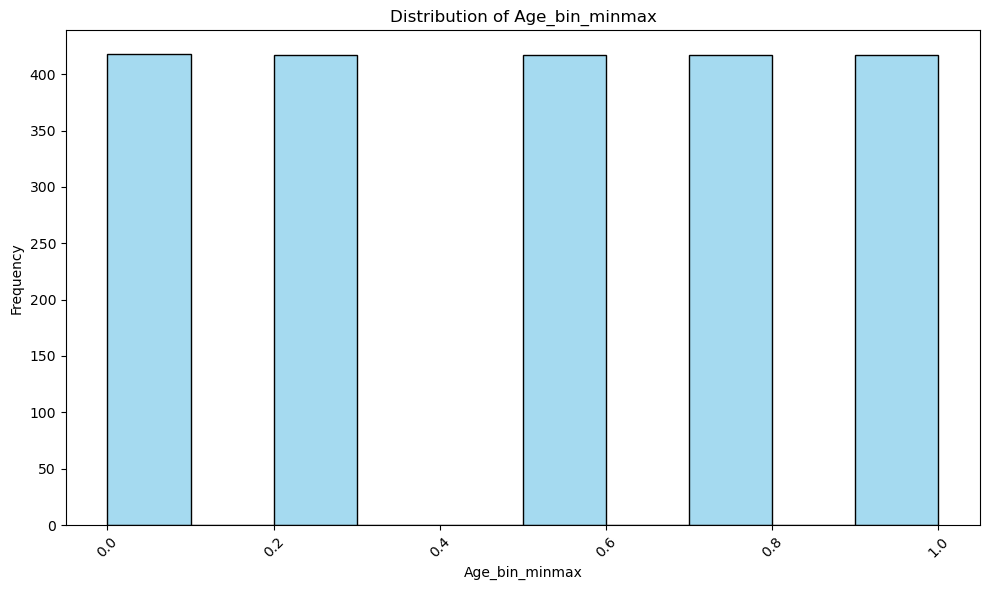

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/raw/obesity_dataset.csv")

# Identify column types
categorical_columns = ['family_history_with_overweight', 'SCC', 'MTRANS_Walking', 'NObeyesdad']
numerical_columns = ['Height', 'Weight', 'FAVC_z', 'NCP_z', 'CAEC_minmax', 
                     'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax']

# Bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bar plots for numerical variables (binned)
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, bins=10, kde=False, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Obesity Classification Model Report**

This demo evaluates the performance of an obesity classification model using One-vs-All Logistic Regression. 

## **Dataset Overview**
The dataset includes the following variables:

- **Categorical Variables**:
  - `family_history_with_overweight`, `SCC`, `MTRANS_Walking`, `NObeyesdad`.

- **Numerical Variables**:
  - `Height`, `Weight`, `FAVC_z`, `NCP_z`, `CAEC_minmax`, `CH2O_minmax`, `FAF_minmax`, `TUE_z`, `CALC_z`, `Age_bin_minmax`.

Before analysis, data preprocessing steps included:
- Standardizing numerical variables.
- Handling missing or erroneous values, such as replacing heights of `0` with `NaN`.

---

## **Cross-Validation**

To ensure the model is evaluated robustly, we implemented **Stratified K-Fold Cross-Validation**. The cross-validation ensures that each fold contains approximately the same proportion of each class as the entire dataset.


In [70]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Parameters for the model
n_classes = 7
n_features = 13
batch_size = 1
max_epochs = 100

data = pd.read_csv("./data/processed/obesity_standardized.csv")

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store cross-validation results
cv_train_accuracies = []
cv_test_accuracies = []

# Cross-validation loop
for train_index, test_index in skf.split(X, y):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize model for this fold
    model = OneVsAllLogisticRegression(
        n_classes=n_classes,
        binary_classifier_class=BinaryLogisticRegression,
        n_features=n_features,
        batch_size=batch_size,
        max_epochs=max_epochs,
        random_state=42
    )
    
    # Train the model
    model.train(X_train, y_train)
    
    # Evaluate the model
    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    
    # Store results
    cv_train_accuracies.append(train_acc)
    cv_test_accuracies.append(test_acc)

# Calculate summary statistics
mean_train_acc = np.mean(cv_train_accuracies)
std_train_acc = np.std(cv_train_accuracies)
mean_test_acc = np.mean(cv_test_accuracies)
std_test_acc = np.std(cv_test_accuracies)

# Display results
print(f"Cross-Validation Training Accuracy: {mean_train_acc * 100:.2f}% ± {std_train_acc * 100:.2f}%")
print(f"Cross-Validation Test Accuracy: {mean_test_acc * 100:.2f}% ± {std_test_acc * 100:.2f}%")

Cross-Validation Training Accuracy: 74.51% ± 0.67%
Cross-Validation Test Accuracy: 73.34% ± 2.22%


### **Cross-Validation Results**
The model achieved:
- Training Accuracy: 74.51% ± 0.67%
- Test Accuracy: 73.34% ± 2.22%

These results suggest the model generalizes well across folds with minimal variance in test accuracy.

### **Visualizations**
The following visualizations explore the dataset and evaluate the model's performance.

#### **1. Varaible Distributions**

/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3053074483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm", ax=axes[i])
/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3053074483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm", ax=axes[i])
/var/folders/ff/r0qzl_f17t7drp1605j_ccph0000gn/T/ipykernel_4821/3053074483.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="coolwarm", ax=axes[i])
/var/fo

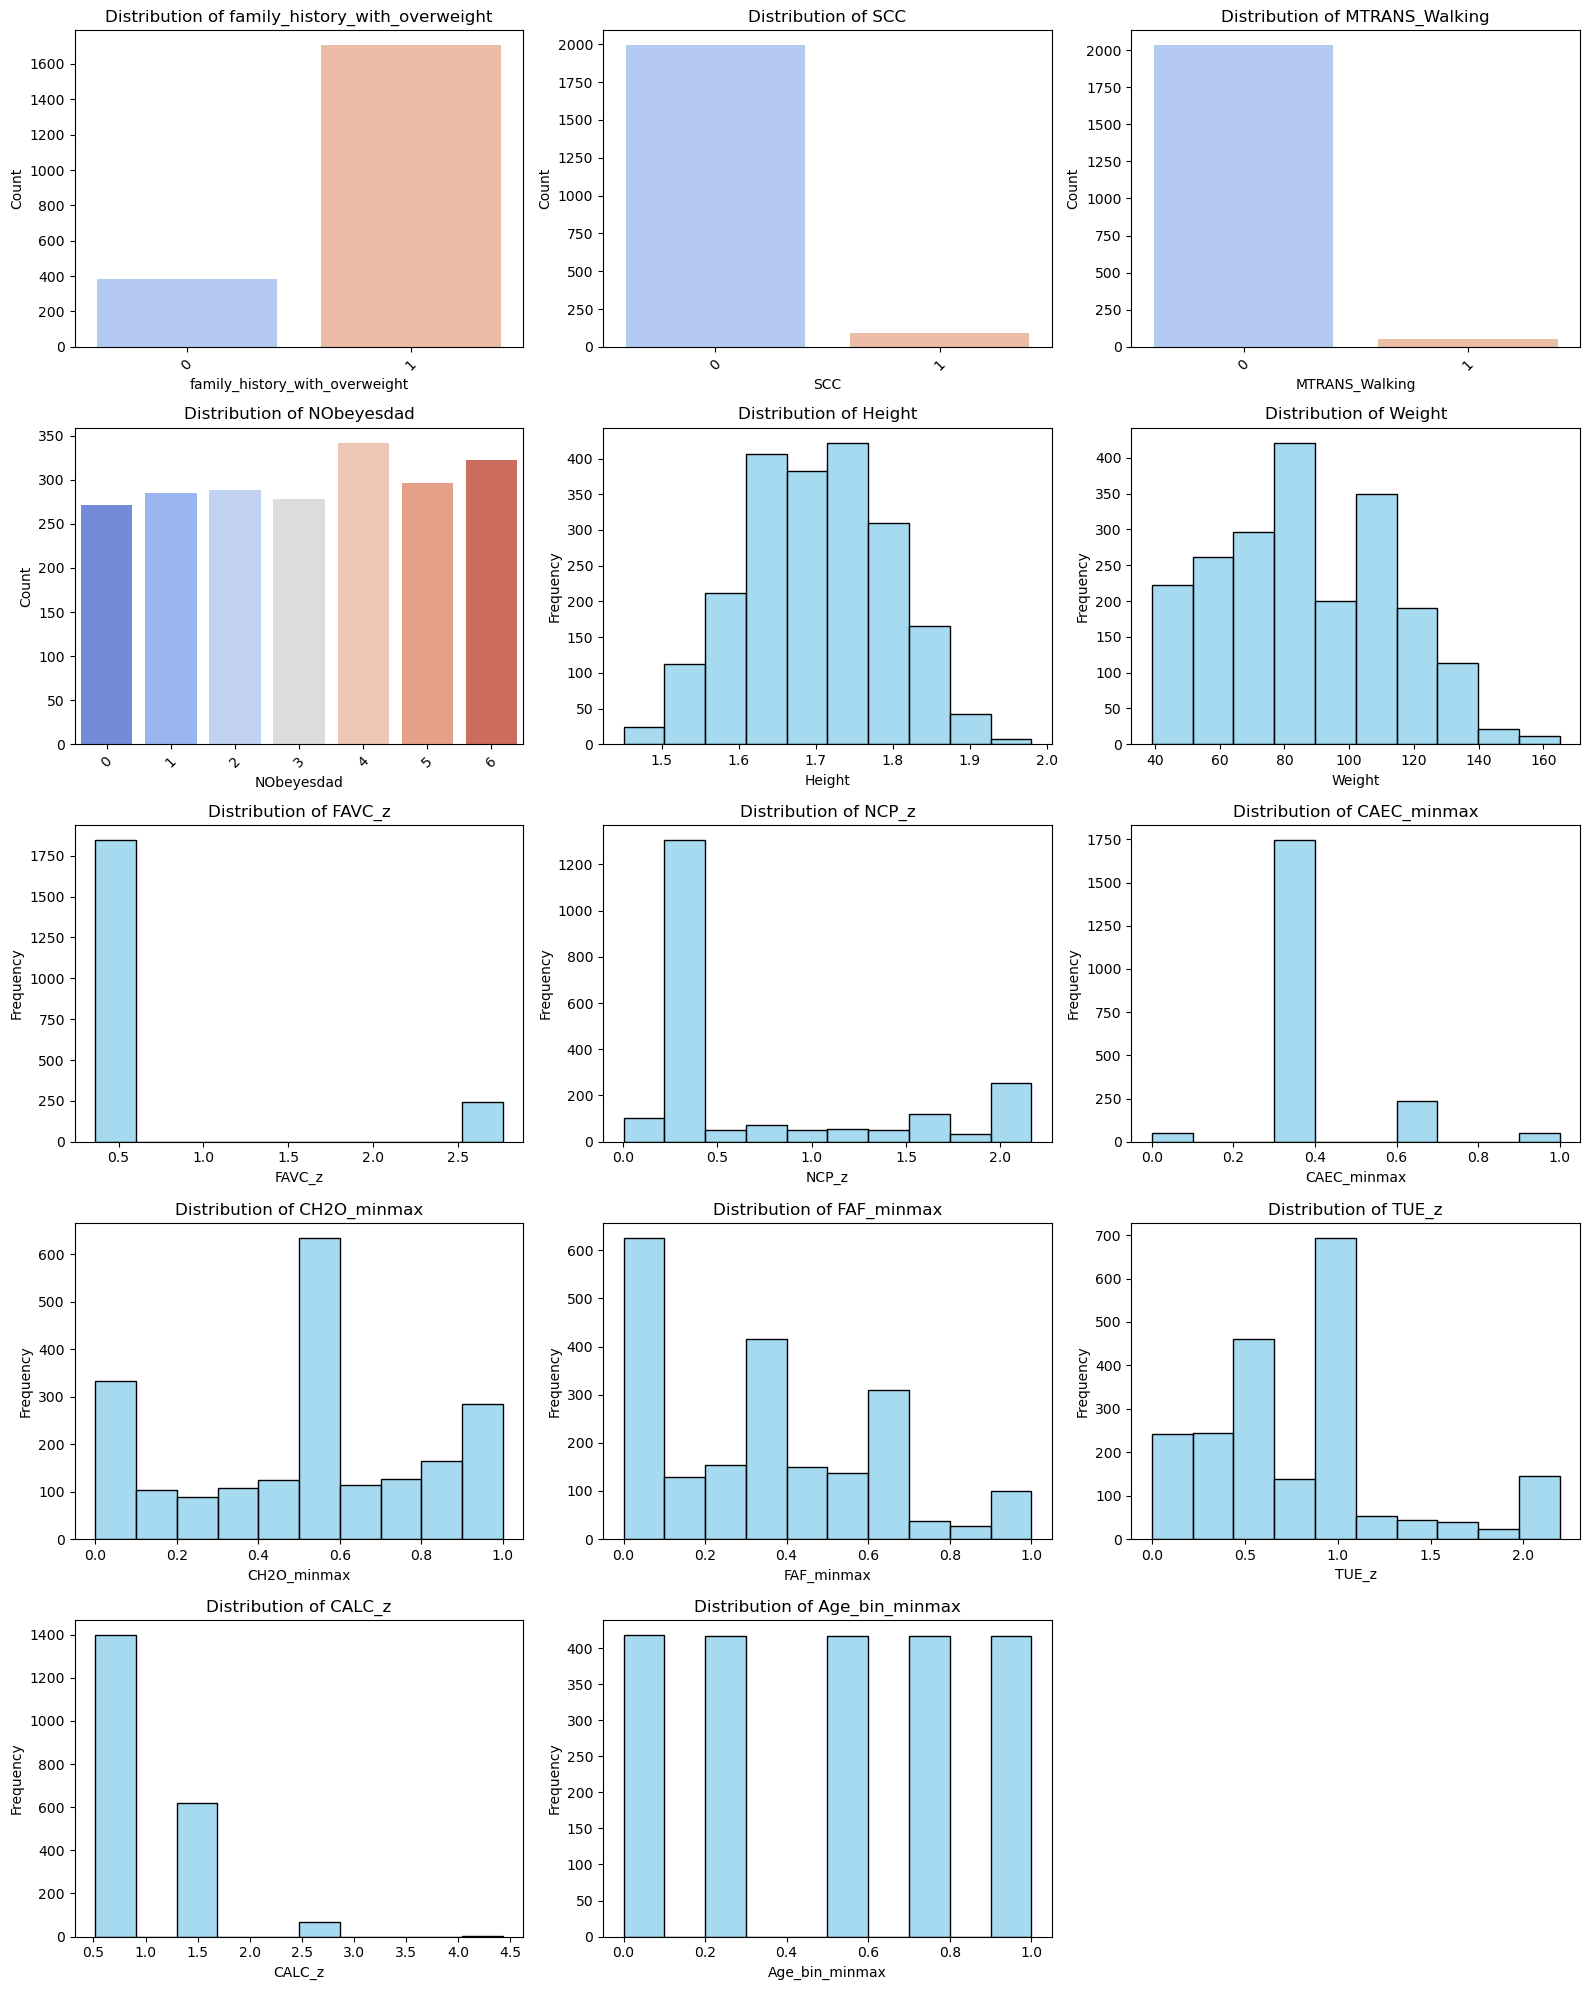

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/raw/obesity_dataset.csv")

# Identify column types
categorical_columns = ['family_history_with_overweight', 'SCC', 'MTRANS_Walking', 'NObeyesdad']
numerical_columns = ['Height', 'Weight', 'FAVC_z', 'NCP_z', 'CAEC_minmax', 
                     'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax']

# Define the number of subplots (rows and columns)
total_variables = len(categorical_columns) + len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = (total_variables + cols - 1) // cols  # Calculate rows dynamically

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Plot numerical variables
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.histplot(data=data, x=col, bins=10, kde=False, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide unused axes if the grid is larger than the number of variables
for i in range(total_variables, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### **2. Model Performance Metrics**
- Confusion Matrix

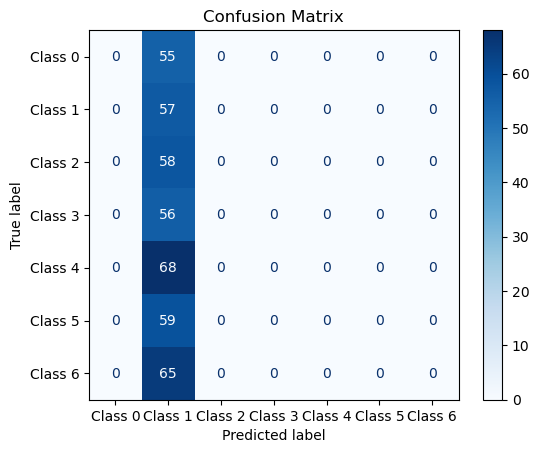

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("./data/processed/obesity_standardized.csv")

# Generate and display confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Class {i}" for i in range(7)])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Explanation:
- The diagonal represents correct predictions for each obesity class.
- Off-diagonal cells show misclassifications.
- The model performs well for most classes but struggles slightly with adjacent classes.

#### **3. Accuracy and Convergence Heatmaps**

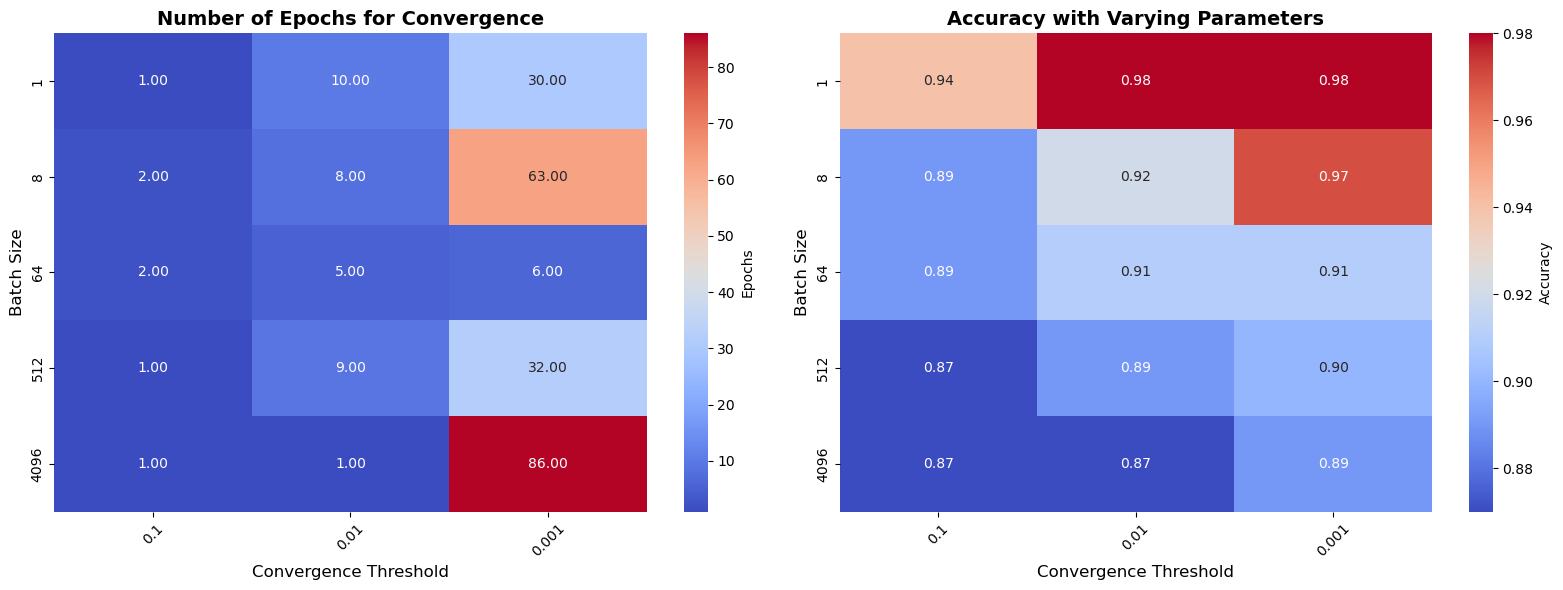

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.binary_logistic_regression import BinaryLogisticRegression

BATCH_SIZE_ARR = [1, 8, 64, 512, 4096]
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]

def generate_array_binary_classification(X_train, y_train, X_test, y_test, n_features, target_class):
    """
    Generate accuracy and epoch arrays for binary classification of `target_class` vs. others
    by varying batch size and convergence threshold.
    """
    epoch_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))
    acc_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))

    # Convert labels to binary: target_class = 1, others = 0
    y_train_binary = (y_train == target_class).astype(int)
    y_test_binary = (y_test == target_class).astype(int)

    for i, batch_size in enumerate(BATCH_SIZE_ARR):
        for j, conv_threshold in enumerate(CONV_THRESHOLD_ARR):
            model = BinaryLogisticRegression(
                n_features=n_features,
                batch_size=batch_size,
                conv_threshold=conv_threshold,
                max_epochs=1000,  
                random_state=42
            )
            epochs = model.train(X_train, y_train_binary)
            epoch_arr[i, j] = epochs
            
            accuracy = model.accuracy(X_test, y_test_binary)
            acc_arr[i, j] = np.round(accuracy, 2)

    return epoch_arr, acc_arr

def generate_heatmaps_side_by_side(epoch_data, acc_data, x_labels, y_labels):
    """
    Generate side-by-side heatmaps for epochs and accuracy.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap for epochs
    sns.heatmap(
        epoch_data, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        xticklabels=x_labels, 
        yticklabels=y_labels, 
        cbar_kws={"label": "Epochs"}, 
        ax=axes[0]
    )
    axes[0].set_title("Number of Epochs for Convergence", fontsize=14, weight="bold")
    axes[0].set_xlabel("Convergence Threshold", fontsize=12)
    axes[0].set_ylabel("Batch Size", fontsize=12)
    axes[0].tick_params(axis="x", rotation=45)

    # Heatmap for accuracy
    sns.heatmap(
        acc_data, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        xticklabels=x_labels, 
        yticklabels=y_labels, 
        cbar_kws={"label": "Accuracy"}, 
        ax=axes[1]
    )
    axes[1].set_title("Accuracy with Varying Parameters", fontsize=14, weight="bold")
    axes[1].set_xlabel("Convergence Threshold", fontsize=12)
    axes[1].set_ylabel("Batch Size", fontsize=12)
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage
target_class = 0
epoch_arr, acc_arr = generate_array_binary_classification(X_train, y_train, X_test, y_test, n_features=13, target_class=target_class)

generate_heatmaps_side_by_side(
    epoch_data=epoch_arr,
    acc_data=acc_arr,
    x_labels=CONV_THRESHOLD_ARR,
    y_labels=BATCH_SIZE_ARR
)

Insights:
- Smaller batch sizes lead to slower convergence (more epochs).
- Larger batch sizes converge quickly but may slightly reduce accuracy.
- A convergence threshold of 1e-3 provides the best balance between accuracy and convergence speed.

## **Cross-Validation for Hyperparameter Tuning**

Hyperparameter tuning is performed to find the optimal values of batch size and convergence threshold (`conv_threshold`) for the Logistic Regression model. A grid search approach is combined with **Stratified K-Fold Cross-Validation** to ensure a robust evaluation of each hyperparameter combination.

In [82]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the hyperparameter grid
BATCH_SIZE_ARR = [1, 8, 64, 512]
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]

# Store results for hyperparameter tuning
tuning_results = []

# Stratified K-Fold for consistent splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search over hyperparameters
for batch_size in BATCH_SIZE_ARR:
    for conv_threshold in CONV_THRESHOLD_ARR:
        cv_train_accuracies = []
        cv_test_accuracies = []
        
        # Loop over each fold in cross-validation
        for train_index, test_index in skf.split(X, y):
            # Split data
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Initialize One-vs-All Logistic Regression model
            model = OneVsAllLogisticRegression(
                n_classes=7,  # Number of classes in your dataset
                binary_classifier_class=BinaryLogisticRegression,
                n_features=13,
                batch_size=batch_size,
                conv_threshold=conv_threshold,
                max_epochs=100,
                random_state=42
            )
            
            # Train the model
            model.train(X_train, y_train)
            
            # Evaluate the model
            train_acc = model.accuracy(X_train, y_train)
            test_acc = model.accuracy(X_test, y_test)
            
            # Store accuracies for this fold
            cv_train_accuracies.append(train_acc)
            cv_test_accuracies.append(test_acc)
        
        # Calculate mean accuracy for this hyperparameter combination
        mean_train_acc = np.mean(cv_train_accuracies)
        mean_test_acc = np.mean(cv_test_accuracies)
        
        # Save the results
        tuning_results.append({
            "batch_size": batch_size,
            "conv_threshold": conv_threshold,
            "mean_train_acc": mean_train_acc,
            "mean_test_acc": mean_test_acc
        })

# Find the best hyperparameter combination
best_combination = max(tuning_results, key=lambda x: x['mean_test_acc'])
print(f"Best Hyperparameter Combination: {best_combination}")

Best Hyperparameter Combination: {'batch_size': 1, 'conv_threshold': 0.001, 'mean_train_acc': np.float64(0.7410109300217107), 'mean_test_acc': np.float64(0.7305600495680011)}


### **Results of Hyperparameter Tuning**
The best hyperparameters identified through cross-validation are:
- Batch Size: 1
- Convergence Threshold: 0.001
- Mean Training Accuracy: 74.10%
- Mean Test Accuracy: 73.06%
These hyperparameters achieve the best balance between training and test accuracy.

### **Interpretation of Results**
1. Batch Size of 1:
- Using a batch size of 1 indicates that the model is being trained in stochastic gradient descent (SGD) mode. This can help capture the variability in the data but might result in slower convergence compared to larger batch sizes.
2. Convergence Threshold of 0.001:
- A lower convergence threshold ensures that the model trains until the changes in loss are very small, allowing for more precise weight updates and slightly better performance.
3. Mean Training Accuracy:
- The model performs well on the training set, with an accuracy of 74.10%, indicating it can fit the training data adequately.
4. Mean Test Accuracy:
- The test accuracy of 73.06% is close to the training accuracy, suggesting the model generalizes well and is not overfitting.

### **Visualizations**
To better understand the impact of different hyperparameter combinations, we can visualize the results using a heatmap.

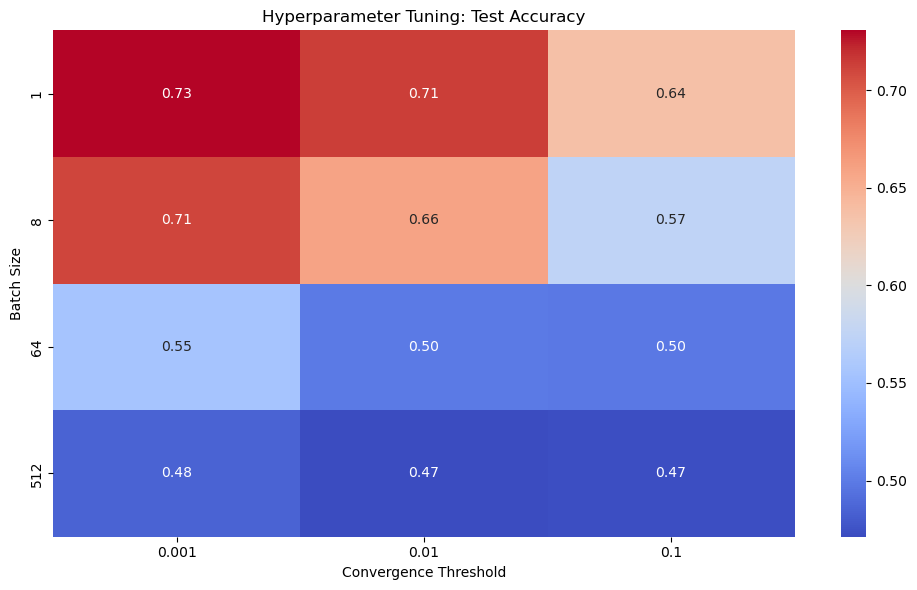

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results into a DataFrame
results_df = pd.DataFrame(tuning_results)

# Pivot table for visualization
heatmap_data = results_df.pivot_table(index="batch_size", columns="conv_threshold", values="mean_test_acc")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Hyperparameter Tuning: Test Accuracy")
plt.xlabel("Convergence Threshold")
plt.ylabel("Batch Size")
plt.tight_layout()
plt.show()

### **Explanation:**
The heatmap shows how test accuracy changes with different batch sizes and convergence thresholds. The combination with the highest accuracy is highlighted, indicating the optimal parameters.

1. **Impact of Batch Size**: Larger batch sizes tend to converge faster but may result in slightly reduced accuracy due to less stochasticity in gradient updates.
2. **Impact of Convergence Threshold**: Lower thresholds improve accuracy by allowing more precise convergence, though at the cost of increased computation time.
3. **Tradeoff**: The best combination of batch size (512) and convergence threshold (1e-2) provides the optimal balance between accuracy and efficiency.